In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm import tqdm

from scipy.stats import skew
from scipy.stats import boxcox

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from skimage.io import imread
from skimage.feature import local_binary_pattern

plt.style.use('science')

# For figure aesthetics
plt.rcParams['mathtext.fontset'] = 'custom'  
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'  
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'  
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'  
plt.rcParams['font.size'] = 16
plt.rcParams['mathtext.fontset'] = 'stix'  
plt.rcParams['font.family'] = 'STIXGeneral' 

In [50]:
path_to_images = "/home/eduardo/repos/PapSmearClassification/data/"
df = pd.read_excel(os.path.join(path_to_images, 'new_database_results.xls'))
map_id_cls = {
    id: label for id, label in zip(df['ID'].values, df['Class'].values)
}

P = 16
radii = [32]

In [51]:
X = []
y = []
for id in tqdm(df['ID'].values):
    img = imread(os.path.join(path_to_images, 'database', 'classification', id))
    lbp = [
        local_binary_pattern(img[:, :, i], P=P, R=R, method='uniform') for i in range(3) for R in radii
    ]
    x = []
    for l in lbp:
        hist = np.histogram(l.flatten(), bins=16)[0]
        x.append(hist)
    x = np.concatenate(x)
    # x = np.log(x.astype(float) / np.linalg.norm(x) + 1e-9)
    X.append(x)
    y.append(map_id_cls[id])
X = np.array(X)
columns_to_drop = np.where(np.isclose(np.var(X, axis=0), 0))[0]
columns_to_keep = [i for i in range(X.shape[1]) if i not in columns_to_drop]
X = X[:, columns_to_keep]
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = np.array(y).reshape(-1, 1)
dataset = np.concatenate([X, y], axis=1)

100%|██████████| 917/917 [00:53<00:00, 17.23it/s]


In [52]:
dataset = np.concatenate([X, y], axis=1)

In [53]:
feature_names = ['feat{}'.format(i + 1) for i in range(X.shape[1])]
data = pd.DataFrame(dataset, columns=feature_names + ['Class'])

In [54]:
data

feat1     feat2     feat3     feat4     feat5     feat6     feat7  \
0   -0.079167  1.578474  2.540665  2.013374  0.863032  0.782629  0.321616   
1    0.315641  0.005441 -0.106219 -0.351385 -0.540101 -0.346336 -0.323008   
2    2.329495  1.415794  0.791473  1.099137  0.652815  0.599312  0.415510   
3    5.288634  4.818289  4.193461  5.435381  6.278011  5.412504  5.267340   
4    3.237601  1.597775  1.472272  2.391327  1.929312  1.180561  1.395988   
..        ...       ...       ...       ...       ...       ...       ...   
912 -0.512592 -0.791416 -1.001902 -0.918315 -0.920011 -0.795687 -0.685947   
913 -0.572317 -0.605299 -0.923580 -0.910653 -0.641411 -0.616841 -0.586635   
914 -0.616691 -0.904464 -0.985836 -0.862132 -0.631280 -0.773331 -0.507186   
915 -0.614532 -0.468813 -0.871365 -0.642511 -0.866824 -0.628018 -0.581218   
916 -0.647632 -0.565318 -0.453647 -0.890223 -0.704729 -0.728619 -0.673307   

        feat8     feat9    feat10  ...    feat40    feat41    feat42  \
0    0.281786  0.553576  0.368134  ...  0.046869  0.490612 -0.019258   
1   -0.342473 -0.007932 -0.351395  ...  0.084995  0.112163  0.085438   
2    0.841276  1.180079  0.305644  ...  1.344676  1.430069  1.216151   
3    4.403549  5.894831  3.462287  ...  7.036119  7.052454  4.115269   
4    0.831630  1.589223  0.419911  ...  2.454904  1.940822  1.237090   
..        ...       ...       ...  ...       ...       ...       ...   
912 -0.556072 -0.646155 -0.585287  ... -0.592122 -0.627301 -0.636010   
913 -0.480279 -0.625911 -0.562076  ... -0.599748 -0.630378 -0.616975   
914 -0.319046 -0.595012 -0.560291  ... -0.499095 -0.624224 -0.620782   
915 -0.505084 -0.640828 -0.585287  ... -0.616523 -0.635506 -0.637914   
916 -0.557450 -0.616322 -0.529938  ... -0.529596 -0.569867 -0.634107   

       feat43    feat44    feat45    feat46    feat47    feat48  Class  
0    0.883655  0.322202  0.642659  0.797741  0.024505  0.535763    1.0  
1    0.232481  0.347560  0.214235  0.418131 -0.304700 -0.051699    1.0  
2    1.855483  2.618484  3.280748  2.654487  1.780026  1.990460    1.0  
3    4.769320  4.838693  5.083217  6.017871  6.156784  5.606577    1.0  
4    2.273155  2.903054  3.085834  3.881827  2.954510  3.119474    1.0  
..        ...       ...       ...       ...       ...       ...    ...  
912 -0.698237 -0.742822 -0.428401 -0.612521 -0.476968 -0.553727    7.0  
913 -0.717969 -0.655478 -0.509454 -0.618421 -0.495216 -0.561882    7.0  
914 -0.604507 -0.754092 -0.494015 -0.632189 -0.513465 -0.587858    7.0  
915 -0.736057 -0.737187 -0.453489 -0.604653 -0.432441 -0.578581    7.0  
916 -0.589708 -0.748457 -0.605946 -0.616454 -0.506896 -0.619356    7.0  

[917 rows x 49 columns]

In [55]:
tsne = TSNE(n_components=2, verbose=1)
emb = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 917 samples in 0.009s...
[t-SNE] Computed neighbors for 917 samples in 0.147s...
[t-SNE] Computed conditional probabilities for sample 917 / 917
[t-SNE] Mean sigma: 0.496992
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.088230
[t-SNE] KL divergence after 1000 iterations: 0.856325


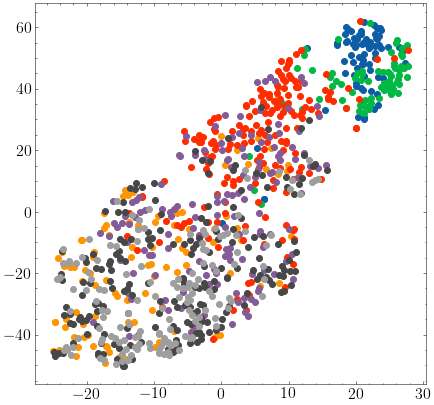

In [56]:
plt.figure(figsize=(7, 7))
for k in np.unique(y):
    ind = np.where(y == k)[0]
    plt.scatter(emb[ind, 0], emb[ind, 1])

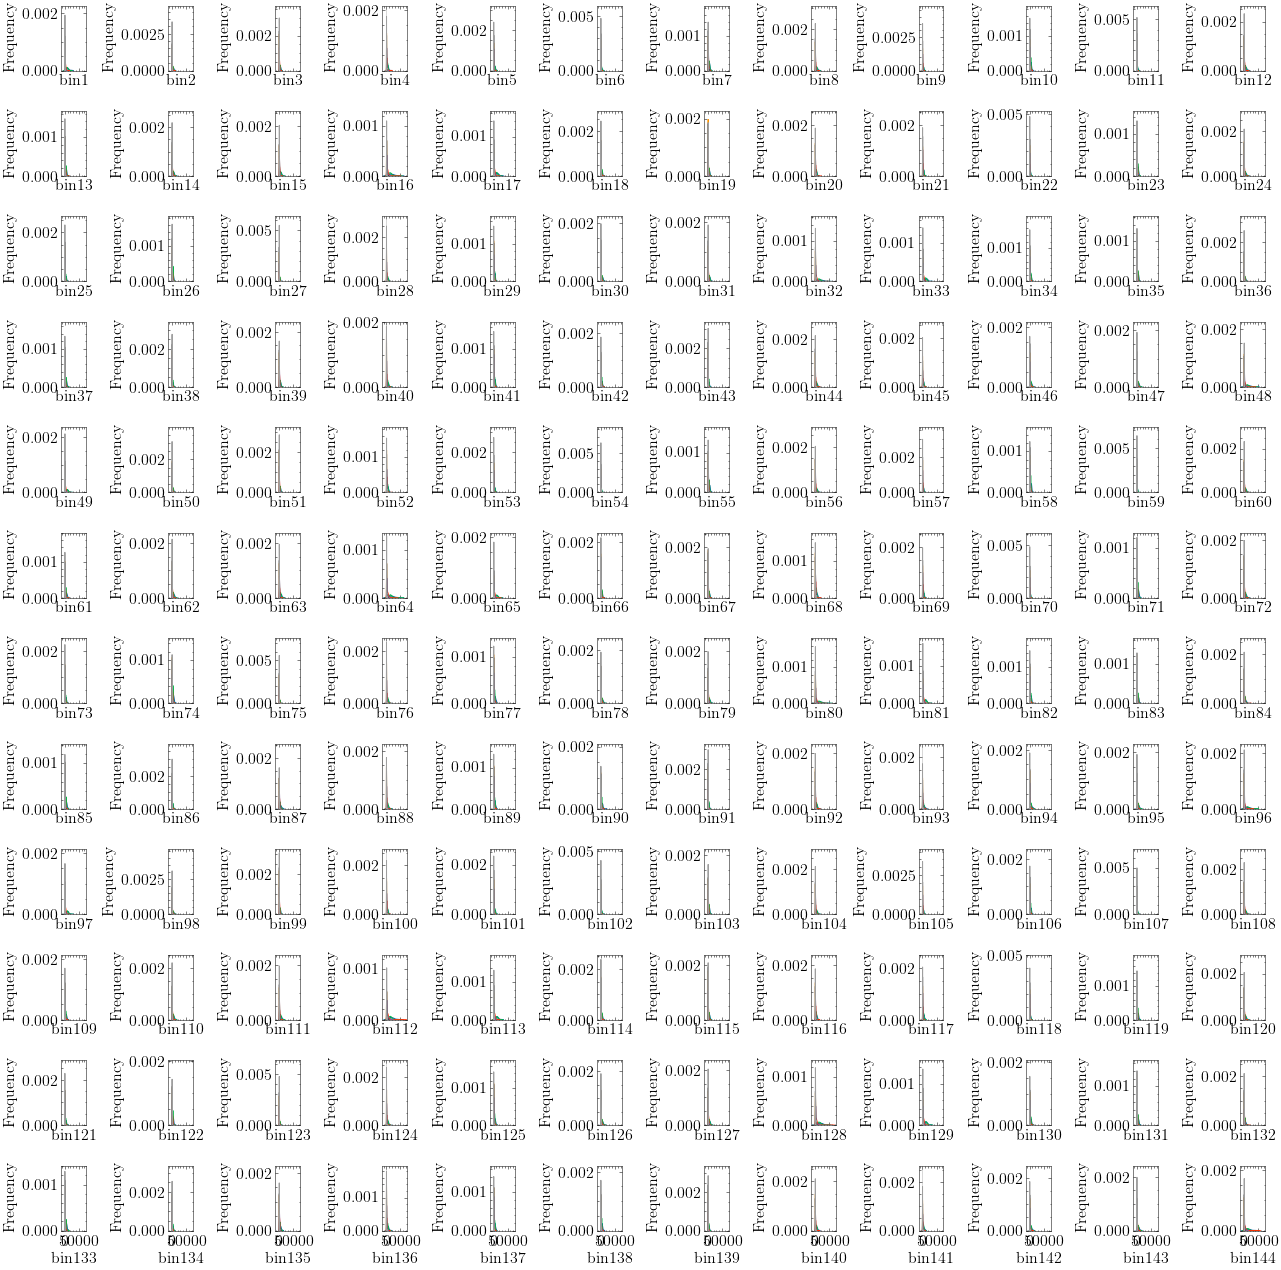

In [39]:
fig, axes = plt.subplots(12, 12, figsize=(18, 18), sharex=True)

for i, ax in enumerate(axes.flatten()):
    for k in np.unique(y):
        try:
            sns.distplot(X[np.where(y == k)[0], i], ax=ax, norm_hist=False)
        except RuntimeError:
            print('err on faeture {}'.format(i))
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('Frequency')
plt.tight_layout()
# plt.savefig('./Figures/Multi_FeatTransfHist.pdf')

In [38]:
12 * 12

144